# Urmia Lake Water Level 

This is a large project regarding saving an in-danger Lake named Urmia Lake in North West of Iran (see the following image from https://www.theguardian.com/). In this Notebook page explanatory Data Analyses is perfomerd in order to clean the data for the next Machine learning and more advanced statistical analysis to find out what is the main reason for the lake running dry. And, how it can be prevented. 
The following Data Sets are analayzed in the Note book:  

* Water Level at the lake  (m) 
___
<a href=''> <img src='https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2015/1/23/1421981805869/e1d6a83b-c92e-469b-8cb1-a5e14e05174e-1020x994.jpeg?width=445&quality=45&auto=format&fit=max&dpr=2&s=591cb8a9ba42ef64d259af6dfb334267' alt="Urmia Lake" width="400" height="400" /></a>
___


In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lake=pd.read_excel('level-volume-area.xlsx')

In [3]:
lake.head(4)


,sal,mah,rooz,level,area (km2),volume (mcm)
0,1344,9,3,1273.82,4210.94,12.54
1,1344,9,4,1273.82,4210.94,12.54
2,1344,9,5,1273.83,4215.19,12.58
3,1344,9,6,1273.83,4215.19,12.58


(6, 0)

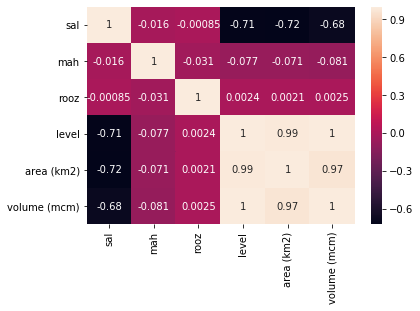

In [4]:
corr=lake.corr()
sns.heatmap(corr, annot=True)
plt.ylim([6,0])

In [5]:
lake.drop(['area (km2)', 'volume (mcm)'], axis=1, inplace=True)

In [6]:
lake.columns

Index(['sal', 'mah', 'rooz', 'level'], dtype='object')

In [10]:
lake['Year']= lake['sal']+622

In [18]:
lake.drop(lake.columns[0],axis=1, inplace=True)


In [21]:
sea_level_Year=lake.groupby('Year').mean()

In [27]:
# sea_level_Year.drop(['mah', 'rooz'], axis=1, inplace=True)

In [30]:
sea_level_Year.max()

level    1277.955041
dtype: float64

<Figure size 504x360 with 0 Axes>

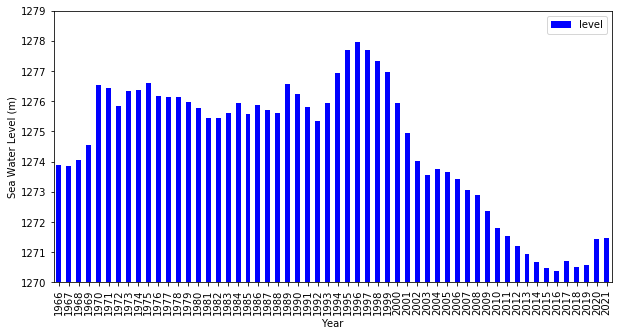

In [44]:
plt.figure(figsize=(7,5))
sea_level_Year.plot(kind='bar', color='b', figsize=(10,5))
plt.ylim([1270, 1279])
plt.ylabel('Sea Water Level (m)')
plt.xlabel('Year')
plt.savefig('water_level_bar_graph.png', dpi=500, bbox_inches='tight')

# plt.show()

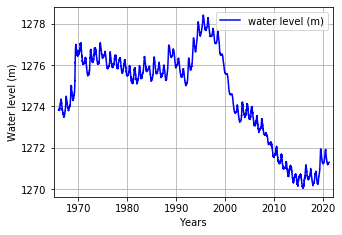

In [8]:
min_water_level=lake['level'].min()
plt.figure(figsize=(5,3.5))
plt.plot(lake.index/365 +1966,lake['level'], 'b', label='water level (m)')
plt.xlabel('Years')
plt.ylabel('Water level (m)')
plt.xlim([1965,2022])
plt.grid('on')
plt.legend()
plt.savefig('water_level.png', dpi=500)
plt.show()


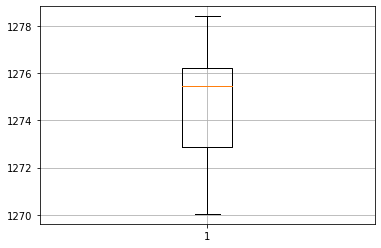

In [9]:
plt.boxplot(lake['level'])
plt.grid('on')